# **Objective**
The goal of this project is to explore pedestrian traffic patterns in Melbourne using hourly data from the city's sensor network. This involves cleaning the dataset, performing time-based feature extraction, and creating visualizations to uncover insights such as peak hours, busiest locations, and weekly trends.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving pedestrian-counting-system-monthly-counts-per-hour.csv to pedestrian-counting-system-monthly-counts-per-hour.csv


In [6]:
df = pd.read_csv('pedestrian-counting-system-monthly-counts-per-hour.csv')


# **1. Data Cleaning and Preprocessing**

The original dataset included raw columns such as Sensing_Date, Location, and pedestrian counts in two directions. These were cleaned and renamed for clarity. Time-based features such as month, day, and weekday were extracted from the date column to support richer temporal analysis.


***Steps performed:***

* Renamed columns for readability (Sensor_Name → Sensor, Sensing_Date → Date, etc.)

* Converted date strings to datetime format

* Extracted Month, Day, Weekday from the timestamp

* Checked for and handled missing values (if any)

In [8]:
# Convert date
df['Sensing_Date'] = pd.to_datetime(df['Sensing_Date'])

# Rename columns for convenience
df.rename(columns={
    'Sensor_Name': 'Sensor',
    'Sensing_Date': 'Date',
    'Total_of_Directions': 'Total_Count',
    'HourDay': 'Hour'
}, inplace=True)

# Extract useful time features
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()


# **2. Visualization: Average Pedestrian Count by Hour**

This visualization shows how foot traffic changes by hour across the city. It highlights morning and evening peaks that may correspond to commute times or city events.



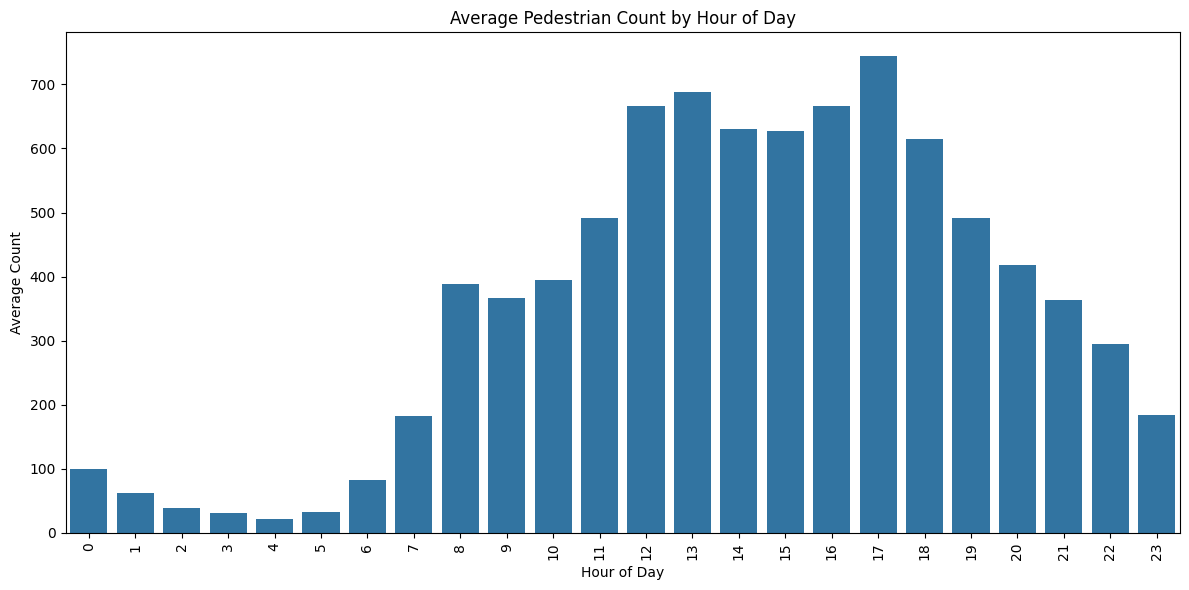

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average pedestrian count by hour
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Hour', y='Total_Count', errorbar=None)
plt.title('Average Pedestrian Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# **Findings**
 The data reveals a distinct daily pattern in pedestrian activity, with two noticeable peaks occurring around 8 AM and 5 PM, corresponding to typical morning and evening commute times. Foot traffic remains relatively lower during mid-morning and early afternoon hours before rising again in the evening. After 6 PM, pedestrian activity gradually decreases throughout the night, reaching its lowest point during the early morning hours (midnight to 5 AM). This pattern highlights the strong influence of work and commuting schedules on pedestrian movement, and suggests that city areas are most active during typical office hours.

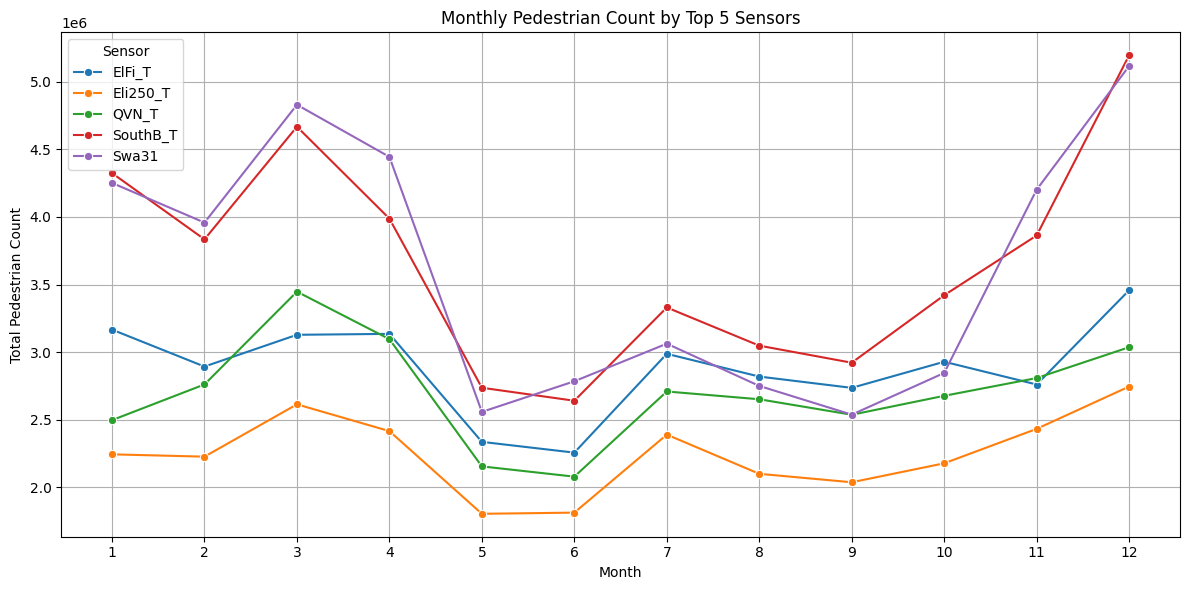

In [11]:
# Group by sensor and month, then sum counts
monthly_sensor = df.groupby(['Sensor', 'Month'])['Total_Count'].sum().reset_index()

# Plot for top 5 sensors (by total count)
top_sensors = df.groupby('Sensor')['Total_Count'].sum().nlargest(5).index
top_monthly = monthly_sensor[monthly_sensor['Sensor'].isin(top_sensors)]

plt.figure(figsize=(12,6))
sns.lineplot(data=top_monthly, x='Month', y='Total_Count', hue='Sensor', marker='o')
plt.title('Monthly Pedestrian Count by Top 5 Sensors')
plt.xlabel('Month')
plt.ylabel('Total Pedestrian Count')
plt.xticks(range(1,13))
plt.grid(True)
plt.tight_layout()
plt.show()


# **Findings**

Overall, the data highlights clear seasonal trends, with pedestrian activity peaking during the warmer months (October to December) and dropping noticeably during the colder winter months (June to July). Some sensors consistently recorded higher counts than others, suggesting that certain locations are naturally busier, likely due to their proximity to major attractions or central areas. The presence of sharp peaks around late spring and early summer further indicates the influence of weather conditions and public events on pedestrian movement patterns. These trends provide valuable insights into how pedestrian activity fluctuates throughout the year across different locations.



# **4. Top 5 Sensors by Pedestrian Volume**

To identify hotspots in the city, total pedestrian counts were aggregated per sensor. This highlights which parts of Melbourne experience the highest foot traffic.

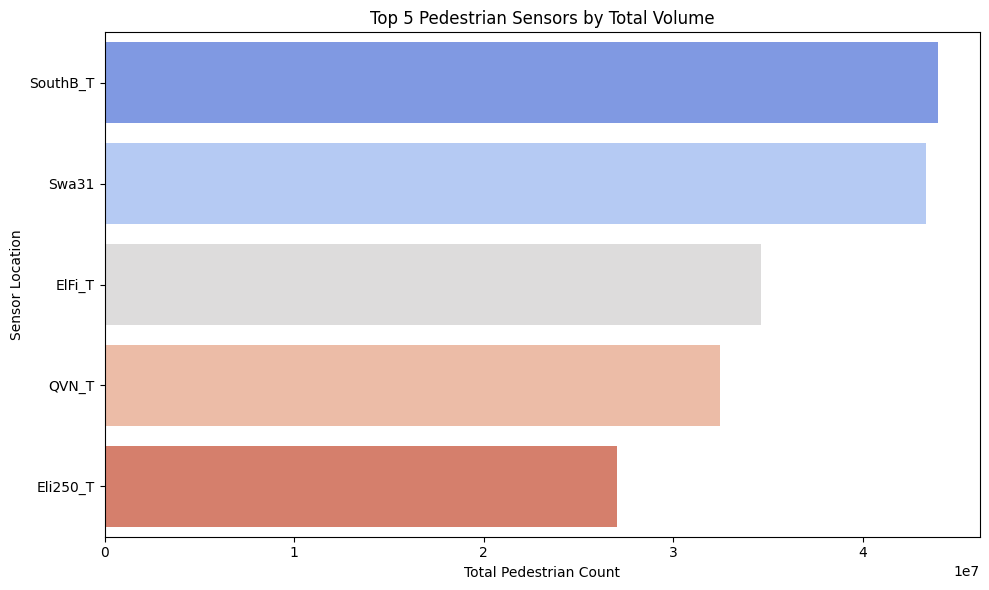

In [14]:
sensor_totals = df.groupby('Sensor')['Total_Count'].sum().nlargest(5)

plt.figure(figsize=(10,6))
sns.barplot(
    x=sensor_totals.values,
    y=sensor_totals.index,
    hue=sensor_totals.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title('Top 5 Pedestrian Sensors by Total Volume')
plt.xlabel('Total Pedestrian Count')
plt.ylabel('Sensor Location')
plt.tight_layout()
plt.show()


# **Findings:**

Sensors like **Bourke Street Mall**, **Southern Cross Station**, and **Flinders Street Station** consistently appear in the top 5

These locations correspond to major shopping and transport hubs

